# HTML网页解析篇

### 1.常用工具介绍
* Xpath:XPath即为XML路径语言（XML Path Language），它是一种用来确定XML文档中某部分位置的语言。
* bs4:一个HTML/XML 的解析器，主要用于解析和提取 HTML/XML 数据。
* re:正则表达式是一种通用的字符串表达框架，用来基于匹配模式测试字符串内的模式，替换文本和查找文本。

### 2.各工具详解
#### 2.1 Xpath

XPath是一种利用路径选取节点的方法，路径就像是我们文件的保存路径，而节点就是文件夹下的文件，这样看我觉得XPath选取速度应该是十分高效的，不用去读取整个xml文件，只需要按路径和文件名取文件就行了。缺点应该就是路径需要准确的设置，不然可能找不到需要的内容，漏找或者错找。XPath有7种节点，元素，属性，文本，注释，文档（根）节点，以及命名空间和处理指令节点。这里我理解的是节点类似于文件夹或者文件。其中文件的子节点可能就是文件内容。但命名空间和处理指令不太好理解。
*XPath使用路径表达式在XML文档中选取节点。节点是通过沿着路径选取的。下面列出了最常用的路径表达式*
* nodename 选取此节点的所有子节点。
* / 从根节点选取。
* // 从匹配选择的当前节点选择文档中的节点，而不考虑它们的位置。
* . 选取当前节点。
* .. 选取当前节点的父节点。
* @ 选取属性。
* /text() 提取标签下面的文本内容

**例子**

* /标签名 逐层提取
* /标签名 提取所有名为<>的标签
* //标签名[@属性=“属性值”] 提取包含属性为属性值的标签
* @属性名 代表取某个属性名的属性值

**XPath的使用，首先从lxml导入etree方法，将html转换为xml对象，就可以用XPath解析内容了**

In [19]:
#实战练习，爬取丁香园评论
from lxml import etree
import requests
import re

In [2]:
url = "http://www.dxy.cn/bbs/thread/626626#626626"

In [3]:
req=requests.get(url)
html=req.text
#将html对象转化为xml对象
tree=etree.HTML(html)

In [17]:
quester=tree.xpath('//div[@class="mainTitle___2V4V1"]/a/text()')
print(quester)

[]


In [21]:
users = tree.xpath('//div[@class="auth"]/a/text()')
contents = tree.xpath('//td[@class="postbody"]')
for user, content in zip(users, contents):
    content = content.xpath('string(.)')
    content = re.sub('\s', '', content)
    print(user,":", content)
    print('-'*100)

楼医生 : 我遇到一个“怪”病人，向大家请教。她，42岁。反复惊吓后晕厥30余年。每次受响声惊吓后发生跌倒，短暂意识丧失。无逆行性遗忘，无抽搐，无口吐白沫，无大小便失禁。多次跌倒致外伤。婴儿时有惊厥史。入院查体无殊。ECG、24小时动态心电图无殊；头颅MRI示小软化灶；脑电图无殊。入院后有数次类似发作。请问该患者该做何诊断，还需做什么检查，治疗方案怎样？
----------------------------------------------------------------------------------------------------
lion000 : 从发作的症状上比较符合血管迷走神经性晕厥，直立倾斜试验能协助诊断。在行直立倾斜实验前应该做常规的体格检查、ECG、UCG、holter和X-ray胸片除外器质性心脏病。贴一篇“口服氨酰心安和依那普利治疗血管迷走性晕厥的疗效观察”作者：林文华任自文丁燕生http://www.ccheart.com.cn/ccheart_site/Templates/jieru/200011/1-1.htm
----------------------------------------------------------------------------------------------------
xghrh : 同意lion000版主的观点：如果此患者随着年龄的增长，其发作频率逐渐减少且更加支持，不知此患者有无这一特点。入院后的HOLTER及血压监测对此患者只能是一种安慰性的检查，因在这些检查过程中患者发病的机会不是太大，当然不排除正好发作的情况。对此患者应常规作直立倾斜试验，如果没有诱发出，再考虑有无可能是其他原因所致的意识障碍，如室性心动过速等，但这需要电生理尤其是心腔内电生理的检查，毕竟是有一种创伤性方法。因在外地，下面一篇文章可能对您有助，请您自己查找一下。心理应激事件诱发血管迷走性晕厥1例，杨峻青、吴沃栋、张瑞云，中国神经精神疾病杂志，2002Vol.28No.2
----------------------------------------------------------------------------------------------------
keys : 该例不排除精神因素导

#### 2.2 bs4

Beautiful Soup库是解析、遍历、维护“标签树”的功能库，也叫beautifulsoup4 或 bs4。约定引用方式如下，即主要是用BeautifulSoup类。BeautifulSoup对应一个HTML/XML文档的全部内容。这里我认为bs4搜索内容会比较慢，因为要遍历整个HTML文件，但其优点是便于理解。

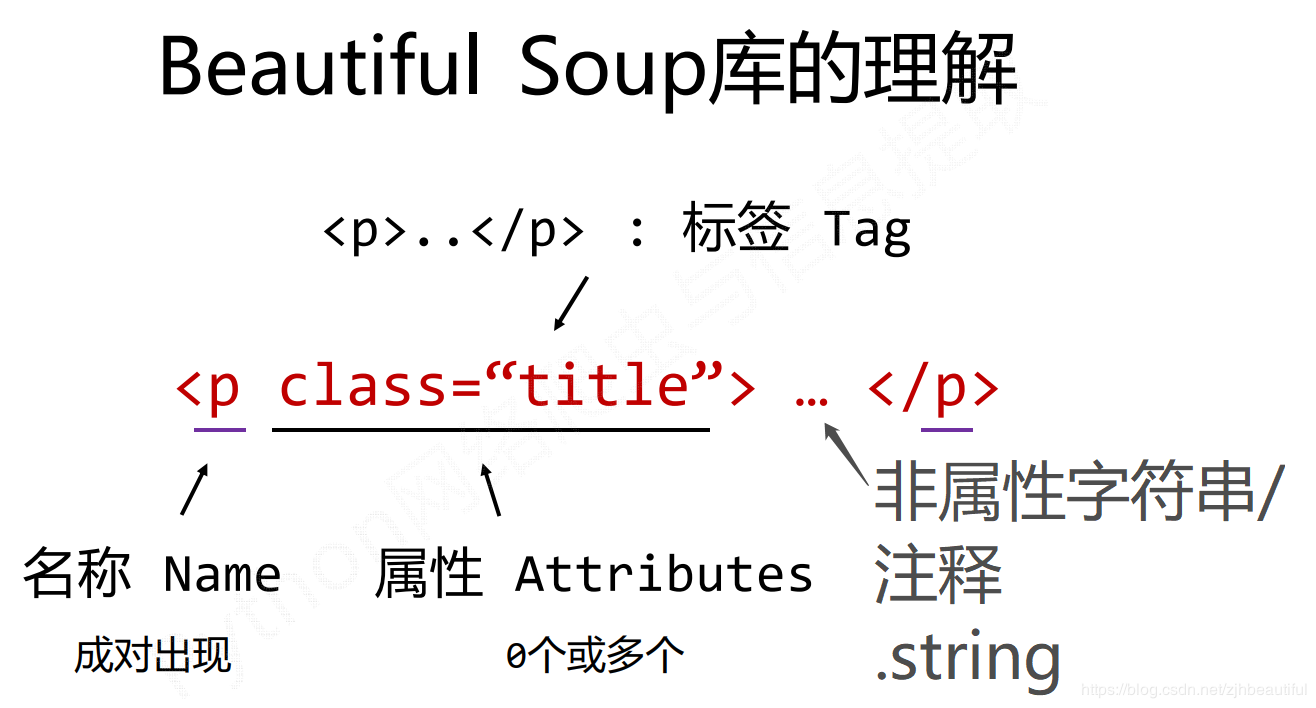

**Beautiful Soup库的基本元素**
Beautiful Soup将复杂HTML文档转换成一个复杂的树形结构，每个节点都是python对象，所有对象可以分为以下5种：

* Tag：标签，最基本的信息组织单元，分别用<>和</>标明开头和结尾
* Name：标签的名字，\<p> 的名字是’p’，格式：\<tag>.name
* Attributes：标签的属性，字典形式组织，格式：\<tag>.attrs
* NavigableString：标签内非属性字符串，<>…</>中字符串，格式：\<tag>.string
* Comment：标签内字符串的注释部分，一种特殊的Comment类型


In [1]:
# 导入bs4库
from bs4 import BeautifulSoup
import requests 

r = requests.get('https://python123.io/ws/demo.html') # 抓取页面（Demo网址）
demo = r.text  # 抓取的数据
demo


'<html><head><title>This is a python demo page</title></head>\r\n<body>\r\n<p class="title"><b>The demo python introduces several python courses.</b></p>\r\n<p class="course">Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:\r\n<a href="http://www.icourse163.org/course/BIT-268001" class="py1" id="link1">Basic Python</a> and <a href="http://www.icourse163.org/course/BIT-1001870001" class="py2" id="link2">Advanced Python</a>.</p>\r\n</body></html>'

In [2]:
# 解析HTML页面
soup = BeautifulSoup(demo, 'html.parser')  # 抓取的页面数据；bs4的解析器
# 有层次感的输出解析后的HTML页面
print(soup.prettify()) # prettify()为HTML文本<>及其内容增加更加'\n',有层次感的输出
# prettify()可用于标签，方法：<tag>.prettify()


<html>
 <head>
  <title>
   This is a python demo page
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    The demo python introduces several python courses.
   </b>
  </p>
  <p class="course">
   Python is a wonderful general-purpose programming language. You can learn Python from novice to professional by tracking the following courses:
   <a class="py1" href="http://www.icourse163.org/course/BIT-268001" id="link1">
    Basic Python
   </a>
   and
   <a class="py2" href="http://www.icourse163.org/course/BIT-1001870001" id="link2">
    Advanced Python
   </a>
   .
  </p>
 </body>
</html>


**基于bs4库的HTML内容遍历方法**

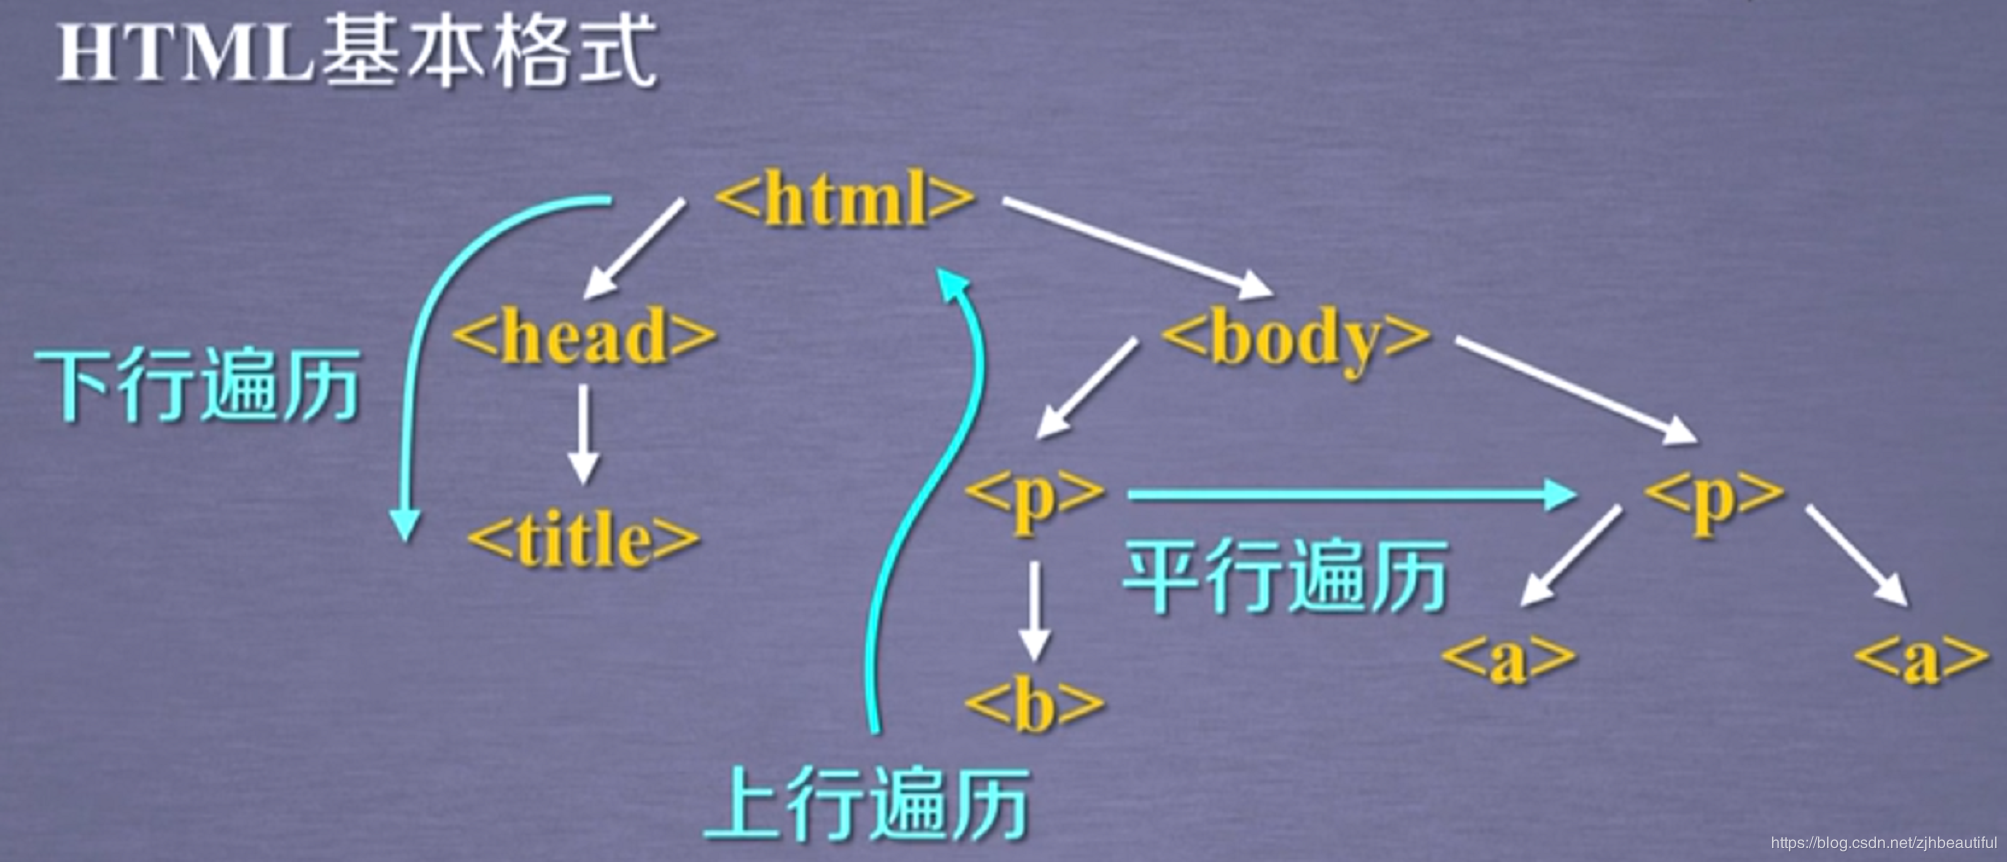

爬取中国大学排名top30

In [3]:
# 导入库
import requests
from bs4 import BeautifulSoup
import bs4

def getHTMLText(url):
    try:
        r = requests.get(url,timeout=30)  # 获取url信息，并且设置时间
        r.raise_for_status()  # 产生异常信息
        r.encoding=r.apparent_encoding  # 修改编码
        return r.text  # 将网页的信息内容返回给程序的其他部分
    except:
        return ""

def fillUnivList(ulist,html):# 提取HTML中关键的数据并且添加一个列表中
    soup = BeautifulSoup(html,"html.parser")
    for tr in soup.find("tbody").children: # 解析HTML代码中的tbody标签所在的位置，在tbody标签中找到每一所大学对应的tr标签
        if isinstance(tr,bs4.element.Tag): #检测tr标签的类型，如果类型不是bs4库定义的Tag类型则过滤掉
            tds=tr('td')  # 对tr标签中的td标签做查询，将所有的td标签存为一个列表类型tds
            ulist.append([tds[0].string,tds[1].string,tds[3].string])  #  在ulist中增加我们需要的对应字段（大学排名，大学名称，大学得分）

def printUnivList(ulist,num):
    tplt = "{0:^10}\t{1:{3}^10}\t{2:^10}"  # 生成一个输出模板的变量，主要增加中间的宽度设定，将变量的输出按照顺序来表示。
    # 把字符串宽度都定义为10，但是中文本身的宽度都不到10所以会填充西文空格（字符），就会导致字符的实际宽度长短不一，所以需要用chr(12288)增加中文空格的变量位置
    # 在1号位填充{3}的原因是：中英文全半角造成不对齐的原因产生在1号位；
    # {3}指的是我们需要对format函数的三个变量(排名，学校名称，总分)进行填充（也就是中文字符的空格填充）
    print(tplt.format("排名","学校名称","总分",chr(12288))) # 实现对表头的打印，用chr(12288)增加中文空格的变量位置
    for i in range(num):
        u=ulist[i] # 将第i个学校信息用一个简短的变量u来代替
        print(tplt.format(u[0],u[1],u[2],chr(12288))) # 将每一所学校信息打印出来。（注：为了保证输出效果，需要用跟表头相一致的字符串表示）
    
def main():
    uinfo=[]
    url='http://www.zuihaodaxue.com/zuihaodaxuepaiming2019.html'
    html=getHTMLText(url)
    fillUnivList(uinfo,html)
    printUnivList(uinfo,30) # 30 univs
    
main()


    排名    	　　　学校名称　　　	    总分    
    1     	　　　清华大学　　　	   94.6   
    2     	　　　北京大学　　　	   76.5   
    3     	　　　浙江大学　　　	   72.9   
    4     	　　上海交通大学　　	   72.1   
    5     	　　　复旦大学　　　	   65.6   
    6     	　中国科学技术大学　	   60.9   
    7     	　　华中科技大学　　	   58.9   
    7     	　　　南京大学　　　	   58.9   
    9     	　　　中山大学　　　	   58.2   
    10    	　哈尔滨工业大学　　	   56.7   
    11    	　北京航空航天大学　	   56.3   
    12    	　　　武汉大学　　　	   56.2   
    13    	　　　同济大学　　　	   55.7   
    14    	　　西安交通大学　　	   55.0   
    15    	　　　四川大学　　　	   54.4   
    16    	　　北京理工大学　　	   54.0   
    17    	　　　东南大学　　　	   53.6   
    18    	　　　南开大学　　　	   52.8   
    19    	　　　天津大学　　　	   52.3   
    20    	　　华南理工大学　　	   52.0   
    21    	　　　中南大学　　　	   50.3   
    22    	　　北京师范大学　　	   49.7   
    23    	　　　山东大学　　　	   49.1   
    23    	　　　厦门大学　　　	   49.1   
    25    	　　　吉林大学　　　	   48.9   
    26    	　　大连理工大学　　	   48.6   
    27    	　　电子科技大学　　	   48.4   
    28    	　　　湖南大学　　　	   48.1   
    29    	　　　苏州大学　　　	   47.3   
    30    

#### 2.3 re

正则式是一个很有用的东西，不仅仅是在爬虫中，在需要对文本进行检索和替换时其作用更是显而易见。

re库采用raw string类型表示正则表达式，表示为：r’text’，raw string是不包含对转义符再次转义的字符串;

re库的主要功能函数：

* re.search() 在一个字符串中搜索匹配正则表达式的第一个位置，返回match对象
* re.search(pattern, string, flags=0)
* re.match() 从一个字符串的开始位置起匹配正则表达式，返回match对象
* re.match(pattern, string, flags=0)
* re.findall() 搜索字符串，以列表类型返回全部能匹配的子串
* re.findall(pattern, string, flags=0)
* re.split() 将一个字符串按照正则表达式匹配结果进行分割，返回列表类型
* re.split(pattern, string, maxsplit=0, flags=0)
* re.finditer() 搜索字符串，返回一个匹配结果的迭代类型，每个迭代元素是match对象
* re.finditer(pattern, string, flags=0)
* re.sub() 在一个字符串中替换所有匹配正则表达式的子串，返回替换后的字符串
* re.sub(pattern, repl, string, count=0, flags=0)

#### 淘宝商品比价定向爬虫

In [4]:
# 导入包
import requests
import re


In [14]:
def getHTMLText(url):
    """
    请求获取html，（字符串）
    :param url: 爬取网址
    :return: 字符串
    """
    try:
        # 添加头信息,
        kv = {'cookie': 'cna=BHVyFBa+t0ICATHdsES3iRyV; miid=1075082542173629467; tracknick=%5Cu98DE%5Cu5C06%5Cu5FA1%5Cu9F99; tg=0; x=e%3D1%26p%3D*%26s%3D0%26c%3D0%26f%3D0%26g%3D0%26t%3D0%26__ll%3D-1%26_ato%3D0; hng=CN%7Czh-CN%7CCNY%7C156; thw=cn; lgc=%5Cu98DE%5Cu5C06%5Cu5FA1%5Cu9F99; enc=C2xzPtfdMpNVaYnv5rMBG0zdkh%2B%2Bbju3NrrpztYRo7BRRq8eOV0pZi2y4CyPt2dotQE86WDrBzyDWe%2BExITgmA%3D%3D; t=42359e10c4b84fbedb69465e38c39a15; tfstk=cLdCBv9G-kqB-eqR1HgNLYXY0E55ZzP1S5jwRdnPevRT36TCisPVcXLdRlNOHN1..; sgcookie=EnreXTKwJbO00G2FSzpyJ; uc3=nk2=1A5k3cd6O1g%3D&lg2=U%2BGCWk%2F75gdr5Q%3D%3D&id2=UojUB5tbfGia3Q%3D%3D&vt3=F8dBxdGMSKvjV%2FO9sms%3D; uc4=nk4=0%401t91W%2BCDKcL90RbNdA6D1rH10w%3D%3D&id4=0%40UOBQgpPAGqTt2VBlywLkwkKm548D; _cc_=V32FPkk%2Fhw%3D%3D; mt=ci=-1_0; cookie2=1498113d88e7262b4fac7e0b9b5889bf; v=0; _tb_token_=aeee1ee6e84a; JSESSIONID=F8A8E12C1E14A108B7574F2CF9CE1049; uc1=cookie14=UoTUPcqZfv0R6w%3D%3D; isg=BG9vMnEJbUfs_2w0qbAKCJ1z_oN5FMM2R1gVSYH8C17l0I_SieRThm2CVsBus5uu; l=eB_ZX00nvPfa0hioBOfaFurza77OSIRYYuPzaNbMiT5P_21B5NphWZjjM3T6C3GVh62DR3ruE3aJBeYBqQAonxv92j-la_kmn'
             ,'user-agent': 'Mozilla/5.0'}
        r = requests.get(url, timeout=30, headers=kv)
        # print(r.status_code)
        r.raise_for_status()
        r.encoding = r.apparent_encoding
        return r.text
    except:
        return "爬取失败"


In [17]:
def parsePage(glist, html):
    '''
    解析网页，搜索需要的信息
    :param glist: 列表作为存储容器
    :param html: 由getHTMLText()得到的
    :return: 商品信息的列表
    '''
    try:
        # 使用正则表达式提取信息
        #商品价格
        price_list = re.findall(r'\"view_price\"\:\"[\d\.]*\"', html)
        #商品名称
        name_list = re.findall(r'\"raw_title\"\:\".*?\"', html)
        for i in range(len(price_list)):
            price = eval(price_list[i].split(":")[1])  #eval（）在此可以去掉""
            name = eval(name_list[i].split(":")[1])
            glist.append([price, name])
    except:
        print("解析失败")


In [19]:
def printGoodList(glist):
    tplt = "{0:^4}\t{1:^6}\t{2:^10}"
    print(tplt.format("序号", "商品价格", "商品名称"))
    count = 0
    for g in glist:
        count = count + 1
        print(tplt.format(count, g[0], g[1]))


In [22]:
# 根据页面url的变化寻找规律，构建爬取url
goods_name = "万代EVA模型"  # 搜索商品类型
start_url = "https://s.taobao.com/search?q=" + goods_name
info_list = []
page = 1  # 爬取页面数量


In [23]:
count = 0
for i in range(page):
    count += 1
    try:
        url = start_url + "&s=" + str(44 * i)
        html = getHTMLText(url)  # 爬取url
        parsePage(info_list, html) #解析HTML和爬取内容
        print("\r爬取页面当前进度: {:.2f}%".format(count * 100 / page), end="")  # 显示进度条
    except:
        continue


爬取页面当前进度: 100.00%